## Importing the important libraries and loading the dataset provided by EXL Analytics for the competition.

In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
df=pd.read_csv("../input/exlanalytics/EQ_2021_Data_Sample (1).csv")
print("Number of rows and columns:", df.shape)
df.head(5)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of rows and columns: (1179375, 82)


,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,...,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1009,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting the data into train and test

In [2]:
training_set = df.iloc[:25000, 1:2].values
test_set = df.iloc[25000:, 1:2].values

## We are doing the data pre-processing.
## Since, the difference in confirmed cases of any two days is very much. Hence, we apply the MinMax Scaling function.

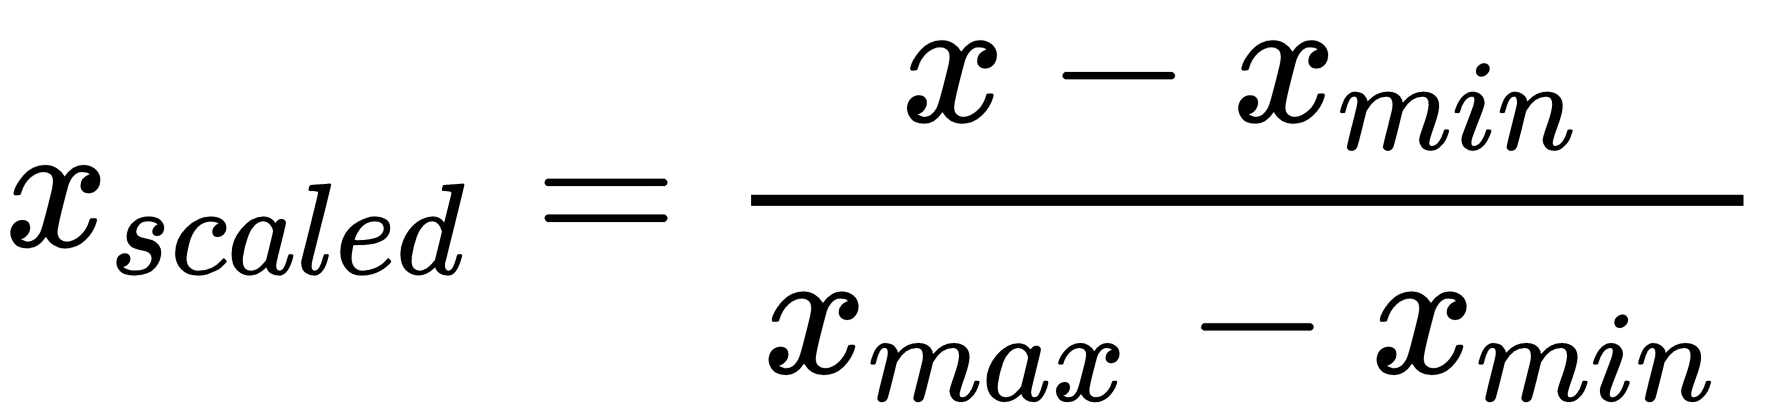



In [3]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 25000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

## 1. Building our RNN-LSTM based Deep Learning model using Tensorflow and Keras Library.
## 2. We will be using MSE (Mean Squared Error) as our evaluation parameter for the model. Then,we validate the model
## 3. Then we trained the model on GPU for 5 epochs.
## 4. We used Adam Optimizer

In [4]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
780/780 [==============================] - 17s 13ms/step - loss: 0.0176
Epoch 2/5
780/780 [==============================] - 10s 13ms/step - loss: 0.0035
Epoch 3/5
780/780 [==============================] - 10s 13ms/step - loss: 0.0026
Epoch 4/5
780/780 [==============================] - 10s 13ms/step - loss: 0.0020
Epoch 5/5
780/780 [==============================] - 10s 13ms/step - loss: 0.0014


## Here we are loading the test dataset. We need to predict the number of cases for the test data.

In [5]:
df_test=pd.read_csv("../input/prediction-submission/EQ-2021-Submission-Template (1).csv")

In [6]:
df_test.shape

(47130, 5)

## Applying the pre-processing techniques on our test data and getting it ready to feed to the model.

In [7]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:40000, 1:2]
dataset_test = df.iloc[40000:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 47190):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(47130, 60, 1)


In [8]:
confirmed_cases = model.predict(X_test)
confirmed_cases = sc.inverse_transform(confirmed_cases)

In [9]:
confirmed_cases.shape

(47130, 1)

## Predicting the data using the model we trained

In [10]:
df_test["Confirmed_cases"]=confirmed_cases

In [11]:
df_test.tail()

,Unnamed: 0,countyFIPS,stateFIPS,date,Confirmed_cases
47125,47126,56045,56,2021-02-11,39.318127
47126,47127,56045,56,2021-02-12,39.318127
47127,47128,56045,56,2021-02-13,39.434853
47128,47129,56045,56,2021-02-14,39.641727
47129,47130,56045,56,2021-02-15,39.856590


## Saving the predictions to a csv file for submission.

In [12]:
df_test.to_csv("submission.csv")